# Superradiance in nanotubular aggregates

In the code below, some of the simulations shown in the paper *Macroscopic coherence as an emergent property in molecular nanotubes* are reproduced. The molecular nanotubes studied in the paper are cylindrical structures inspired to the geometry of *Chlorobaculum Tepidum*, a member of the family of Green Sulphur bacteria. These bacteria live in deep water in some lakes and basins, where little light can penetrate. Therefore, their survival is tied to efficient mechanisms of sunlight absorption. The molecules of these bacteria can be modelled as dipoles provided that the bacterium size and dimensions are small enough to be compared to the sunlight wavelength. From a quantum-mechanical standpoint, a crucial property of these bacteria is superradiance, which roughly consists on absorbing and transferring energy at a very fast timescale. The energy spectrum of the system is quantized and a superradiant state close to the ground state is the optimal condition of the above bacteria to survive also in hostile environmental conditions. From the results shown in the paper, it emerges that natural structures show indeed this property. On the other hand, this does not happen in artificial structures where molecules are dipoles parallel to the cylindrical axis. In this project, we deal with two structures made of parallel dipoles. 

The former is a ring with radius $R$ and made of $N$ molecules, the latter is a cylinder split into $n_1$ rings, each of which contains $n_2$ molecules. All of the rings are equally spaced and their vertical distance is $h=8.3$ A. Next, the Mukamel Hamiltonian is computed for both structures. Once it has been diagonalized, its eigenvalues are calculated. The real part of the eigenvalues is the energy of each state, the imaginary part is used to compute the radiative decay of every state. 

In [1]:
# Generate the structure of the ring

import pandas as pd
import numpy as np
import math

def positions_components_ring(N, n1, R, eps, alpha, beta, phi, h):

    n2 = N // n1 # number of molecules/ring (should be integer)

    positions = []
    components = []

    for j in range(n2):

        theta = j*phi

        rx = R*math.cos(theta)
        ry = R*math.sin(theta)
        rz = 0

        xx = -math.sin(beta)*math.sin(theta)
        yy = math.sin(beta)*math.cos(theta)
        zz = math.cos(beta)

        positions.append([rx, ry, rz])
        components.append([xx, yy, zz])

    positions = pd.DataFrame(positions, columns = ["r$_x$", "r$_y$", "r$_z$"])
    components = pd.DataFrame(components, columns = ["$x$", "$y$", "$z$"])

    return positions, components



if __name__ == '__main__':


    Phi = 2 * math.pi / 60 # azimuthal angle between two consecutive dipoles in the same ring


    pos_ring = positions_components_ring(60, 1, 60, 0, 0, 0, Phi, 8.3)[0]
    com_ring = positions_components_ring(60, 1, 60, 0, 0, 0, Phi, 8.3)[1]
    
    pos_ring.to_csv("positions_ring.csv")
    com_ring.to_csv("components_ring.csv")

In [2]:
# Generate the structure of the cylinder

def positions_components(N, n1, R, eps, alpha, beta, phi, h):

    n2 = N // n1 # number of molecules/ring (should be integer)

    positions = []
    components = []

    for i in range(n1):
        for j in range(n2):

            theta = j*phi

            rx = R*math.cos(theta)
            ry = R*math.sin(theta)
            rz = h*i

            xx = -math.sin(beta)*math.sin(theta)
            yy = math.sin(beta)*math.cos(theta)
            zz = math.cos(beta)

            positions.append([rx, ry, rz])
            components.append([xx, yy, zz])

    positions = pd.DataFrame(positions, columns = ["r$_x$", "r$_y$", "r$_z$"])
    components = pd.DataFrame(components, columns = ["$x$", "$y$", "$z$"])

    return positions, components



if __name__ == '__main__':

    H = 8.3 # vertical distance between two consecutive rings
    Phi = 2 * math.pi / 60 # azimuthal angle between two consecutive dipoles in the same ring


    pos_cyl = positions_components(6000, 100, 60, 0, 0, 0, Phi, H)[0]
    comp_cyl = positions_components(6000, 100, 60, 0, 0, 0, Phi, H)[1]
    
    pos_cyl.to_csv("positions_cylinder.csv")
    comp_cyl.to_csv("components_cylinder.csv")

In [3]:
# Set some physical quantities common to both systems

e0 = 15390 # site energy
k0 = 2*math.pi*e0*10**(-8) # wave number associated with the site energy
mu2 = 151024 # absolute value of the transition dipole
gamma = 4/3 *mu2*k0**3 # radiative decay 

## Single ring (PD model)

In [4]:
# positions of the molecules over the ring

rx_r = pos_ring["r$_x$"].values
ry_r = pos_ring["r$_y$"].values
rz_r = pos_ring["r$_z$"].values

# components of each molecule in the ring

xx_r = com_ring["$x$"].values
yy_r = com_ring["$y$"].values
zz_r = com_ring["$z$"].values

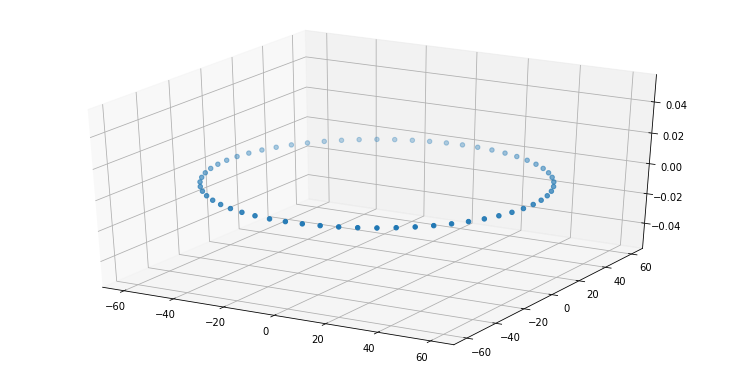

In [5]:
# Geometrical representation of the ring

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)

ax.scatter(rx_r, ry_r, rz_r)
plt.show()

### Hamiltonian of the system

In [6]:
# Initialize the Hamiltonian as a complex matrix made of 0 entirely

n_r = len(rx_r) # number of molecules 

Ham_r = np.zeros((n_r, n_r), dtype = complex)
Ham_r # show Hamiltonian

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [7]:
# Setting the diagonal elements of the Hamiltonian 

for i in range(n_r):
    Ham_r[i][i]=complex(e0,-gamma/2)
    

In [8]:
# Build the off-diagonal terms of the Hamiltonian (equations (3), (4) of the paper)

for j in range(n_r-1):
    for i in range(j+1, n_r):
        muimuj = xx_r[i]*xx_r[j] + yy_r[i]*yy_r[j] + zz_r[i]*zz_r[j]
        a = xx_r[i]*(rx_r[j]-rx_r[i]) + yy_r[i]*(ry_r[j]-ry_r[i]) + zz_r[i]*(rz_r[j]-rz_r[i])
        b = xx_r[j]*(rx_r[j]-rx_r[i]) + yy_r[j]*(ry_r[j]-ry_r[i]) + zz_r[j]*(rz_r[j]-rz_r[i])
        c = math.sqrt((rx_r[i]-rx_r[j])**2+(ry_r[i]-ry_r[j])**2+(rz_r[i]-rz_r[j])**2)
        
        muiri = a / c
        mujrj = b / c
        rirj = c * k0 
        
        
        delta= 3*gamma/4*((-math.cos(rirj)/rirj + math.sin(rirj)/(rirj)**2 + math.cos(rirj)/(rirj)**3)*muimuj -
                       muiri*mujrj*( -math.cos(rirj)/rirj + 3*math.sin(rirj)/(rirj)**2 + 3*math.cos(rirj)/(rirj)**3))
        
        qq = 3*gamma/2*((math.sin(rirj)/rirj + math.cos(rirj)/(rirj)**2 - math.sin(rirj)/(rirj)**3)*muimuj -
                        muiri*mujrj*(math.sin(rirj)/rirj + 3*math.cos(rirj)/(rirj)**2 - 3*math.sin(rirj)/(rirj)**3))
        
        Ham_r[j][i] += complex(delta, -qq)
        
        Ham_r[i][j] = Ham_r[j][i] # the Hamiltonian is non-Hermitian
        

In [9]:
# Diagonalize the Hamiltonian and get the real and the imaginary part of the eigenvalues

from numpy import linalg as LA

energies_r = []
decays_r = []

for item in LA.eigvals(Ham_r):
    energies_r.append(item.real-e0)
    decays_r.append(abs(item.imag)/gamma)

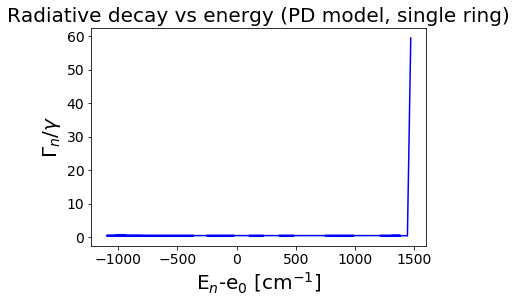

In [11]:
# Represent the radiative decay of the states in the energy spectrum

plt.plot(energies_r, decays_r, c = 'b')
plt.xlabel("E$_n$-e$_0$ [cm$^{-1}$]", fontsize = 20)
plt.ylabel("$\Gamma_n/\gamma$", fontsize = 20)
plt.title("Radiative decay vs energy (PD model, single ring)", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Cylinder (PD model)

In [12]:
# positions of the molecules across the cylinder

rx = pos_cyl["r$_x$"].values
ry = pos_cyl["r$_y$"].values
rz = pos_cyl["r$_z$"].values

# components of each molecule

xx = comp_cyl["$x$"].values
yy = comp_cyl["$y$"].values
zz = comp_cyl["$z$"].values

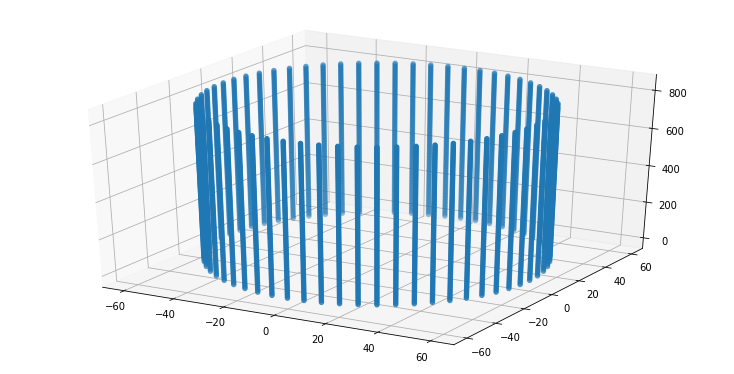

In [13]:
# Geometrical representation of the cylinder

fig1 = plt.figure(figsize = (10,5))
ax1 = Axes3D(fig1)

ax1.scatter(rx, ry, rz)
plt.show()

### Hamiltonian of the system

In [14]:
# Initialize the Hamiltonian Ham as a complex matrix made of 0 entirely

N = len(rx) # number of molecules for each ring

Ham = np.zeros((N, N), dtype = complex)
Ham # show Hamiltonian

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [15]:
# Setting the diagonal elements of the Hamiltonian 

for i in range(N):
    Ham[i][i]=complex(e0,-gamma/2)
    

In [16]:
# Build the off-diagonal terms of the Hamiltonian (equations (3), (4) of the paper)

for j in range(N-1):
    for i in range(j+1, N):
        muimuj = xx[i]*xx[j] + yy[i]*yy[j] + zz[i]*zz[j]
        a = xx[i]*(rx[j]-rx[i]) + yy[i]*(ry[j]-ry[i]) + zz[i]*(rz[j]-rz[i])
        b = xx[j]*(rx[j]-rx[i]) + yy[j]*(ry[j]-ry[i]) + zz[j]*(rz[j]-rz[i])
        c = math.sqrt((rx[i]-rx[j])**2+(ry[i]-ry[j])**2+(rz[i]-rz[j])**2)
        
        muiri = a / c
        mujrj = b / c
        rirj = c * k0 
        
        
        re = 3*gamma/4*((-math.cos(rirj)/rirj + math.sin(rirj)/(rirj)**2 + math.cos(rirj)/(rirj)**3)*muimuj -
                       muiri*mujrj*( -math.cos(rirj)/rirj + 3*math.sin(rirj)/(rirj)**2 + 3*math.cos(rirj)/(rirj)**3))
        
        im = 3*gamma/2*((math.sin(rirj)/rirj + math.cos(rirj)/(rirj)**2 - math.sin(rirj)/(rirj)**3)*muimuj -
                        muiri*mujrj*(math.sin(rirj)/rirj + 3*math.cos(rirj)/(rirj)**2 - 3*math.sin(rirj)/(rirj)**3))
        
        Ham[j][i] += complex(re, -im)
        
        Ham[i][j] = Ham[j][i] # the Hamiltonian is non-Hermitian
        

In [18]:
# Diagonalize the Hamiltonian and get the real and the imaginary part of the eigenvalues

energies = []
decays = []

for item in LA.eigvals(Ham): 
    energies.append(item.real-e0)
    decays.append(abs(item.imag)/gamma)

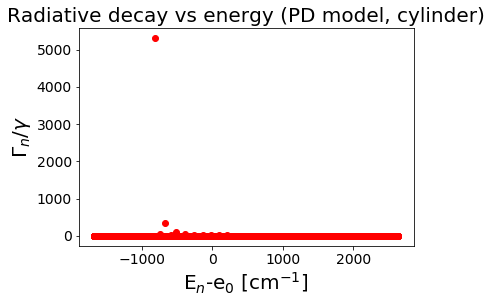

In [21]:
# Represent the radiative decay of the states in the energy spectrum

plt.plot(energies, decays, 'ro')
plt.xlabel("E$_n$-e$_0$ [cm$^{-1}$]", fontsize = 20)
plt.ylabel("$\Gamma_n/\gamma$", fontsize = 20)
plt.title("Radiative decay vs energy (PD model, cylinder)", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()